# Simple Linear Regression

### Build a Simple Linear Regression model with university student dataset where GPA is the target variable. Also understand the correaltion and RMSE between the SAT_Score and GPA.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import statsmodels.formula.api as smf

In [2]:
#import dataset
score = pd.read_csv(r"D:\360digi\DS\Sharath\Simple_linearRegression\handson\Datasets_SLR\SAT_GPA.csv")
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SAT_Scores  200 non-null    int64  
 1   GPA         200 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.2 KB


In [3]:
score.describe()

,SAT_Scores,GPA
count,200.000000,200.000000
mean,491.810000,2.849500
std,174.893834,0.541076
min,202.000000,2.000000
25%,349.750000,2.400000
50%,480.500000,2.800000
75%,641.500000,3.400000
max,797.000000,3.900000


In [4]:
# missing value check
score.isnull().sum()

SAT_Scores    0
GPA           0
dtype: int64

In [5]:
score.head(10)

,SAT_Scores,GPA
0,206,2.3
1,214,2.4
2,717,3.5
3,580,2.8
4,404,2.6
5,701,3.2
6,331,2.1
7,356,2.2
8,292,2.1
9,526,3.0


In [6]:
score.columns

Index(['SAT_Scores', 'GPA'], dtype='object')

In [7]:
score.sort_values('SAT_Scores', ascending = True, inplace = True)

In [8]:
score.reset_index(inplace = True, drop = True)

In [9]:
score.head()

,SAT_Scores,GPA
0,202,2.3
1,206,2.3
2,214,2.4
3,214,2.4
4,217,2.4


In [10]:
# Split the data into Target and Predictors

In [11]:
X = pd.DataFrame(score['SAT_Scores'])

In [12]:
Y = pd.DataFrame(score['GPA'])

In [13]:
# Select numeric features for data preprocessing
numeric_features = ['SAT_Scores']
numeric_features

['SAT_Scores']

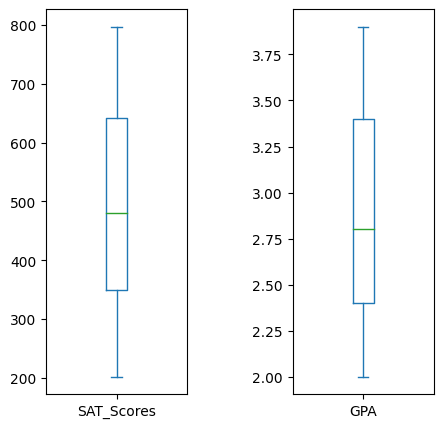

In [14]:
# box plot visualisation
score.plot(kind = 'box', subplots = True, sharey = False, figsize = (5,5))
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [15]:
#No outliers

In [16]:
# Below steps are not necessary for our dataset but creating a pipeline so we can test the algorithm with new dataset easily.

In [17]:
# Winsorization
winsor = Winsorizer(capping_method = 'iqr', tail = 'both', fold = 1.5, variables = numeric_features)
winsor

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['SAT_Scores'])

In [18]:
num_pipeline = Pipeline(steps = [('impute', SimpleImputer(strategy = 'mean'))])
num_pipeline

Pipeline(steps=[('impute', SimpleImputer())])

In [19]:
outlier_pipeline = Pipeline(steps = [('winsor', winsor)])
outlier_pipeline

Pipeline(steps=[('winsor',
                 Winsorizer(capping_method='iqr', fold=1.5, tail='both',
                            variables=['SAT_Scores']))])

In [20]:
preprocessor = ColumnTransformer(transformers = [('num', num_pipeline, numeric_features)])
print(preprocessor)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute', SimpleImputer())]),
                                 ['SAT_Scores'])])


In [21]:
preprocessor1 = ColumnTransformer(transformers = [('wins', outlier_pipeline, numeric_features)])
print(preprocessor1)

ColumnTransformer(transformers=[('wins',
                                 Pipeline(steps=[('winsor',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['SAT_Scores']))]),
                                 ['SAT_Scores'])])


In [22]:
impute_data = preprocessor.fit(X)

In [23]:
score['SAT_Scores'] = pd.DataFrame(impute_data.transform(X))

In [24]:
X2 = pd.DataFrame(score['SAT_Scores'])

In [25]:
winz_data = preprocessor1.fit(X2)

In [26]:
score['SAT_Scores'] = pd.DataFrame(winz_data.transform(X))

In [27]:
score.head()

,SAT_Scores,GPA
0,202,2.3
1,206,2.3
2,214,2.4
3,214,2.4
4,217,2.4


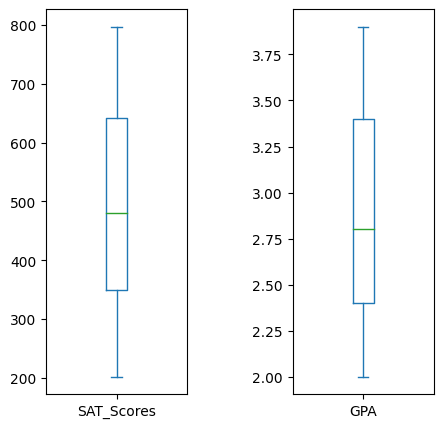

In [28]:
# box plot visualisation
score.plot(kind = 'box', subplots = True, sharey = False, figsize = (5,5))
plt.subplots_adjust(wspace = 0.75)
plt.show()

In [29]:
# Exploratory Data Analysis

In [30]:
import sweetviz as sv

report = sv.analyze(score)
report.show_html('EDAreport.html')

D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |█████████████████████████████████████████| [100%]   00:00 -> (00:00 left)


Report EDAreport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [31]:
# Graphical analysis

<BarContainer object of 200 artists>

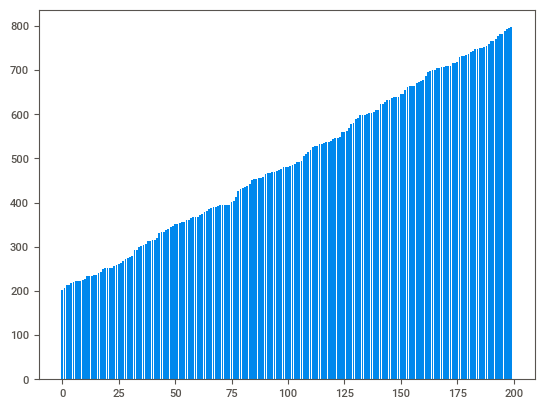

In [32]:
plt.bar(height = score.SAT_Scores, x = np.arange(200))

(array([26., 17., 21., 19., 24., 17., 17., 20., 20., 19.]),
 array([202. , 261.5, 321. , 380.5, 440. , 499.5, 559. , 618.5, 678. ,
        737.5, 797. ]),
 <BarContainer object of 10 artists>)

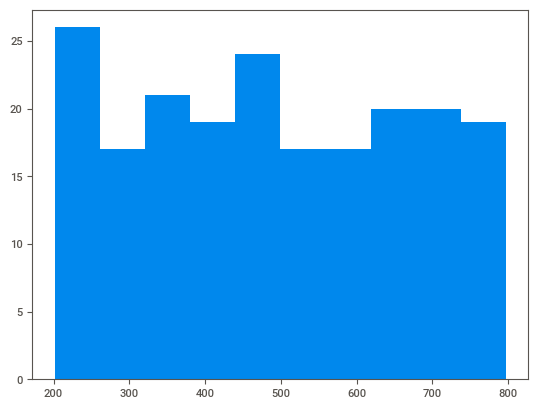

In [33]:
plt.hist(score.SAT_Scores) #histogram

<BarContainer object of 200 artists>

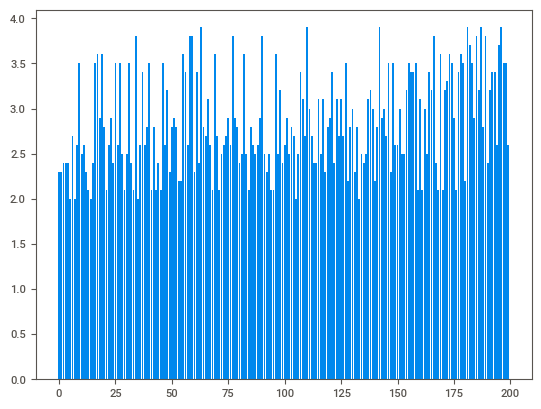

In [34]:
plt.bar(height = score.GPA, x = np.arange(200))

(array([23., 14., 34., 28., 25., 14.,  9., 28., 11., 14.]),
 array([2.  , 2.19, 2.38, 2.57, 2.76, 2.95, 3.14, 3.33, 3.52, 3.71, 3.9 ]),
 <BarContainer object of 10 artists>)

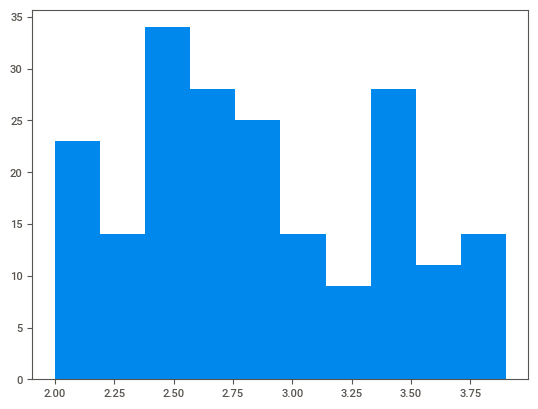

In [35]:
plt.hist(score.GPA) #histogram

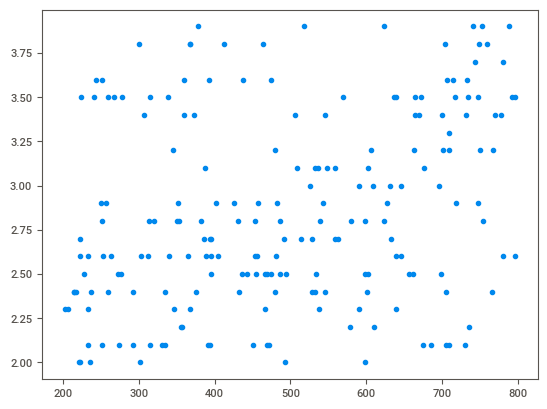

In [36]:
# # Bivariate Analysis
# Scatter plot
plt.scatter(x = score['SAT_Scores'], y = score['GPA'])

In [ ]:
# Cannot infer the direction as the points are scattered everywhere. 
# lot of dispersion which hints noisy data and strength can be weak.

In [37]:
# Correlation coefficient
np.corrcoef(score.SAT_Scores, score.GPA)

array([[1.        , 0.29353828],
       [0.29353828, 1.        ]])

In [38]:
# correlation between SAT Score and GPA is 29%(very poor)

In [39]:
# Covariance
cov_output = np.cov(score.SAT_Scores, score.GPA)[0, 1]
cov_output

27.777793969849238

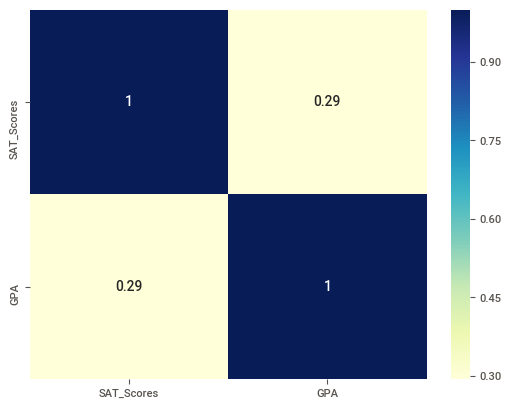

In [40]:
#Heatmap
dataplot = sns.heatmap(score.corr(), annot = True, cmap = "YlGnBu")

# Regression Techniques

### Simple Linear Regression Y ~ X
### GPA ~ SAT_Scores

In [41]:
model = smf.ols('GPA ~ SAT_Scores', data = score).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     18.67
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           2.46e-05
Time:                        00:58:22   Log-Likelihood:                -151.44
No. Observations:                 200   AIC:                             306.9
Df Residuals:                     198   BIC:                             313.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4029      0.110     21.908      0.000       2.187       2.619
SAT_Scores     0.0009      0.000      4.321      0.000       0.000       0.001
==============================================================================
Omnibus:                       12.519   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                7.558
Skew:                           0.317   Prob(JB):                       0.0228
Kurtosis:                       2.290   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# GPA = 2.4029 + 0.0009(SAT_Scores)
# R-squared : 0.086  where |r| < 0.4 is considered as weak correlation
# RMSE : 0.5159

In [43]:
# using t-statistic we get P-value
# std err = s/sqrt(n)
# To get t = coef/std err = 2.4029/0.110 = 21.8445
# For P-value : Ho : Null hypothesis, Ha : Alternative hypothesis. p-value = 0.0000 < 0.05 then P low Ho go
#CI 95% - [0.025	0.975] 
# F-statistic : 2.46e-05 < 0.05 then its a good equation

In [44]:
pred1 = model.predict(pd.DataFrame(score['SAT_Scores']))

pred1

0      2.586314
1      2.589947
2      2.597212
3      2.597212
4      2.599936
         ...   
195    3.112123
196    3.118479
197    3.122112
198    3.125745
199    3.126653
Length: 200, dtype: float64

In [45]:
# Error calculation (error = AV - PV)
res1 = score.GPA - pred1

print(np.mean(res1))

8.171241461241152e-16


In [46]:
res_sqr1 = res1 * res1
mse1 = np.mean(res_sqr1)
rmse1 = np.sqrt(mse1)
rmse1

0.5159457227723686

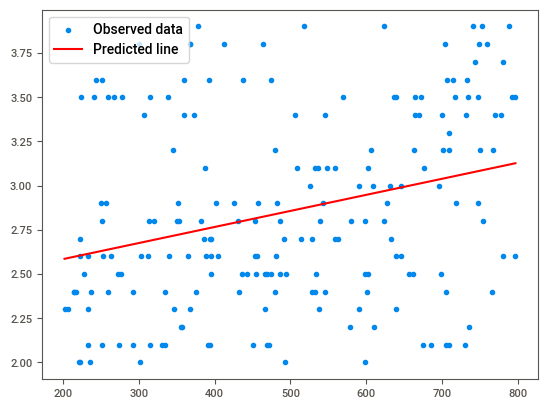

In [47]:
# Regression Line
plt.scatter(score.SAT_Scores, score.GPA)
plt.plot(score.SAT_Scores, pred1, "r")
plt.legend(['Observed data', 'Predicted line'])
plt.show()

## Model Tuning with Transformations

### Log Transformation
### x = log(SAT_Scores); y = GPA

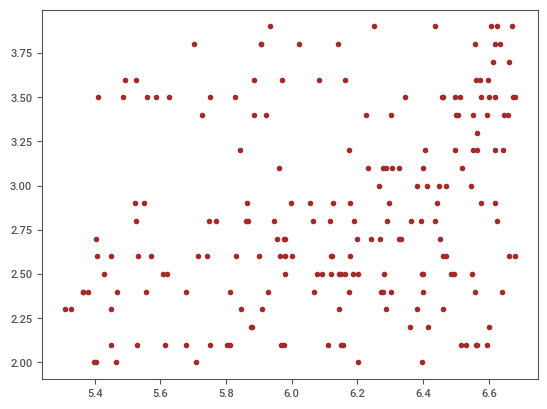

In [48]:
plt.scatter(x = np.log(score['SAT_Scores']), y = score['GPA'], color = 'brown')

In [49]:
#correlation
np.corrcoef(np.log(score.SAT_Scores), score.GPA)

array([[1.        , 0.27771976],
       [0.27771976, 1.        ]])

In [50]:
model2 = smf.ols('GPA ~ np.log(SAT_Scores)', data = score).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     16.55
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           6.85e-05
Time:                        00:58:28   Log-Likelihood:                -152.42
No. Observations:                 200   AIC:                             308.8
Df Residuals:                     198   BIC:                             315.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.4796      0.584      0.822      0.412      -0.672       1.631
np.log(SAT_Scores)     0.3868      0.095      4.068      0.000       0.199       0.574
==============================================================================
Omnibus:                       15.866   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.435
Skew:                           0.320   Prob(JB):                       0.0147
Kurtosis:                       2.224   Cond. No.                         99.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# cal = 0.4796 + 0.3868	(log(SAT_Scores))
# R-squared : 0.077  where |r| < 0.4 is considered as weak correlation
# RMSE : 0.5184

In [52]:
pred2 = model2.predict(pd.DataFrame(score['SAT_Scores']))

In [53]:
# Error calculation
res2 = score.GPA - pred2
res_sqr2 = res2 * res2
mse2 = np.mean(res_sqr2)
rmse2 = np.sqrt(mse2)
rmse2

0.5184904101080667

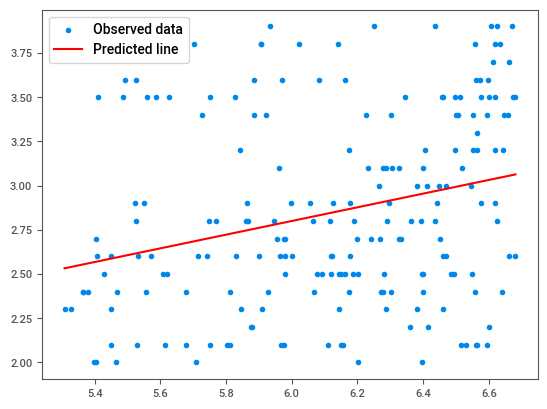

In [54]:
# Regression Line
plt.scatter(np.log(score.SAT_Scores), score.GPA)
plt.plot(np.log(score.SAT_Scores), pred2, "r")
plt.legend(['Observed data', 'Predicted line'])
plt.show()

### Exponential transformation
### x = SAT_Scores; y = log(GPA)

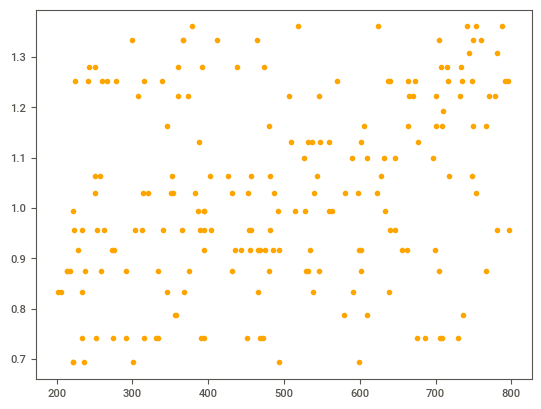

In [55]:
plt.scatter(x = score['SAT_Scores'], y = np.log(score['GPA']), color = 'orange')

In [56]:
#correlation
np.corrcoef(score.SAT_Scores, np.log(score.GPA))

array([[1.        , 0.29408419],
       [0.29408419, 1.        ]])

In [57]:
model3 = smf.ols('np.log(GPA) ~ SAT_Scores', data = score).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(GPA)   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     18.75
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           2.37e-05
Time:                        00:58:31   Log-Likelihood:                 58.615
No. Observations:                 200   AIC:                            -113.2
Df Residuals:                     198   BIC:                            -106.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8727      0.038     22.745      0.000       0.797       0.948
SAT_Scores     0.0003   7.35e-05      4.330      0.000       0.000       0.000
==============================================================================
Omnibus:                       11.046   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                4.816
Skew:                           0.066   Prob(JB):                       0.0900
Kurtosis:                       2.251   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
# log(GPA) = 0.8727 + 0.0003(SAT_Scores)
# R-squared : 0.086  where |r| < 0.4 is considered as weak correlation
# RMSE : 0.5175

In [59]:
pred3 = model3.predict(pd.DataFrame(score['SAT_Scores']))

In [60]:
pred3_at = np.exp(pred3)
print(pred3_at)

0      2.552418
1      2.555671
2      2.562188
3      2.562188
4      2.564636
         ...   
195    3.069051
196    3.075898
197    3.079817
198    3.083741
199    3.084723
Length: 200, dtype: float64


In [61]:
res3 = score.GPA - pred3_at
res_sqr3 = res3 * res3
mse3 = np.mean(res_sqr3)
rmse3 = np.sqrt(mse3)
rmse3

0.5175875893834134

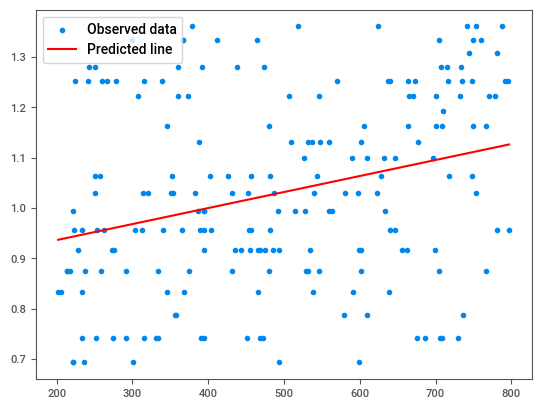

In [62]:
# Regression Line
plt.scatter(score.SAT_Scores, np.log(score.GPA))
plt.plot(score.SAT_Scores, pred3, "r")
plt.legend(['Observed data', 'Predicted line'])
plt.show()

### Polynomial transformation 
### x = SAT_Scores; x^2 = SAT_Scores*SAT_Scores; y = log(GPA)
### log(y) ~ x + x^2

In [63]:
X = pd.DataFrame(score['SAT_Scores'])

In [64]:
Y = pd.DataFrame(score['GPA'])

In [65]:
model4 = smf.ols('np.log(GPA) ~ SAT_Scores + I(SAT_Scores*SAT_Scores)', data = score).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(GPA)   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     10.23
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           5.95e-05
Time:                        00:58:34   Log-Likelihood:                 59.448
No. Observations:                 200   AIC:                            -112.9
Df Residuals:                     197   BIC:                            -103.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.0056      0.110      9.112      0.000       0.788       1.223
SAT_Scores                    -0.0003      0.000     -0.607      0.545      -0.001       0.001
I(SAT_Scores * SAT_Scores)  6.142e-07   4.79e-07      1.284      0.201    -3.3e-07    1.56e-06
==============================================================================
Omnibus:                        8.598   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                4.118
Skew:                           0.046   Prob(JB):                        0.128
Kurtosis:                       2.303   Cond. No.                     2.79e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
# log(GPA) = 1.0056 - 0.0003	(SAT_Scores) + 6.142e-07(SAT_Scores*SAT_Scores)
# R-squared : 0.094  where |r| > 0.4 is considered as weak correlation
# RMSE : 


In [67]:
pred4 = model4.predict(pd.DataFrame(score))
print(pred4)

0      0.971681
1      0.971516
2      0.971245
3      0.971245
4      0.971164
         ...   
195    1.152301
196    1.157005
197    1.159719
198    1.162453
199    1.163140
Length: 200, dtype: float64


In [68]:
pred4_at = np.exp(pred4)
pred4_at

0      2.642382
1      2.641946
2      2.641231
3      2.641231
4      2.641016
         ...   
195    3.165469
196    3.180392
197    3.189037
198    3.197769
199    3.199965
Length: 200, dtype: float64

In [69]:
# Error calculation
res4 = score.GPA - pred4_at
res_sqr4 = res4 * res4
mse4 = np.mean(res_sqr4)
rmse4 = np.sqrt(mse4)
rmse4

0.5144912487746156

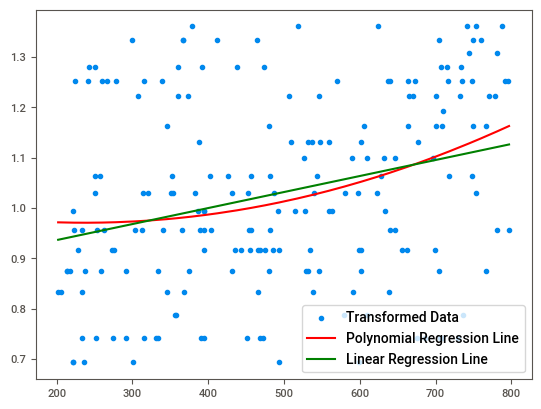

In [70]:
plt.scatter(X['SAT_Scores'], np.log(Y['GPA']))
plt.plot(X['SAT_Scores'], pred4, color = 'red')
plt.plot(X['SAT_Scores'], pred3, color = 'green', label = 'linear')
plt.legend(['Transformed Data', 'Polynomial Regression Line', 'Linear Regression Line'])
plt.show()

## Choose the best model using RMSE

In [71]:
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model", "Poly model"]), "RMSE":pd.Series([rmse1, rmse2, rmse3, rmse4])}
table_rmse = pd.DataFrame(data)

In [72]:
table_rmse

,MODEL,RMSE
0,SLR,0.515946
1,Log model,0.518490
2,Exp model,0.517588
3,Poly model,0.514491


In [ ]:
# Polynomial model is better than others but still the equation doesnt fit the data well.
# The linear regression does not fit the data which has high variance.

In [ ]:
# Experiment
# Noise removal and fitting on smoothened data

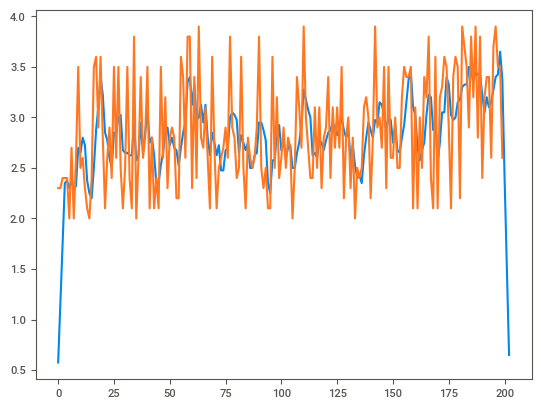

In [73]:
from IPython import display
for h in range(1,5):
    display.clear_output(True)
    plt.plot(np.convolve(score['GPA'],np.ones(h)/h))
    plt.plot(score['GPA'])
    plt.pause(.1)

(200,) (200,)


D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


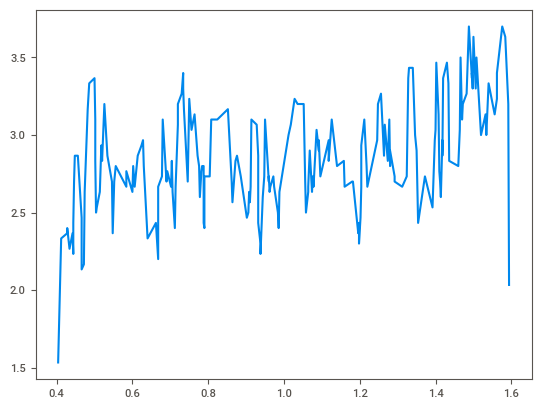

In [74]:
# # Bivariate Analysis
# Scatter plot
#plt.scatter(x = score['SAT_Scores'], y = (100+score['GPA'])**2)# np.log(np.sqrt(score['SAT_Scores']))
X = score['SAT_Scores']/500; Y = np.convolve((score['GPA']),np.ones(3)/3,'same')
score_cp = pd.DataFrame(np.hstack([X[:,None],Y[:,None]]))
plt.plot(X,Y)
print(X.shape,Y.shape)

In [75]:
np.hstack([X[:,None],Y[:,None]]).shape

D:\InstalledSoftwares\Anaconda3\envs\dsenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


(200, 2)

In [76]:
# y = ax3 + bx2 + cx + d
#model5 = smf.ols('Y ~ I(X*X*X) + I(X*X) + X', data = score_cp).fit()
h=10
model5 = smf.ols('Y ~ np.vander(X,h,True)', data = score_cp).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     12.53
Date:                Sat, 25 Feb 2023   Prob (F-statistic):           1.55e-15
Time:                        00:58:56   Log-Likelihood:                -24.695
No. Observations:                 200   AIC:                             69.39
Df Residuals:                     190   BIC:                             102.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 -276.5552    181.887     -1.520      0.130    -635.332      82.222
np.vander(X, h, True)[0]  -276.5552    181.887     -1.520      0.130    -635.332      82.222
np.vander(X, h, True)[1]  5517.6351   3974.268      1.388      0.167   -2321.721    1.34e+04
np.vander(X, h, True)[2] -2.358e+04   1.88e+04     -1.256      0.211   -6.06e+04    1.35e+04
np.vander(X, h, True)[3]  5.691e+04   5.04e+04      1.129      0.260   -4.25e+04    1.56e+05
np.vander(X, h, True)[4] -8.535e+04   8.47e+04     -1.008      0.315   -2.52e+05    8.17e+04
np.vander(X, h, True)[5]  8.242e+04   9.26e+04      0.890      0.374      -1e+05    2.65e+05
np.vander(X, h, True)[6] -5.117e+04   6.59e+04     -0.777      0.438   -1.81e+05    7.88e+04
np.vander(X, h, True)[7]  1.966e+04   2.95e+04      0.667      0.505   -3.84e+04    7.78e+04
np.vander(X, h, True)[8] -4224.7839   7521.506     -0.562      0.575   -1.91e+04    1.06e+04
np.vander(X, h, True)[9]   384.4583    836.561      0.460      0.646   -1265.682    2034.598
==============================================================================
Omnibus:                        0.149   Durbin-Watson:                   0.891
Prob(Omnibus):                  0.928   Jarque-Bera (JB):                0.297
Skew:                           0.018   Prob(JB):                        0.862
Kurtosis:                       2.815   Cond. No.                     5.91e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.12e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [77]:
pred5 = model5.predict(score_cp)

pred5

0      1.741062
1      1.962836
2      2.296831
3      2.296831
4      2.390713
         ...   
195    3.276363
196    3.163496
197    3.071187
198    2.955079
199    2.921970
Length: 200, dtype: float64

In [78]:
# Error calculation (error = AV - PV)
res5 = score_cp[1] - pred5

print(np.mean(res5))

res_sqr5 = res5 * res5
mse5 = np.mean(res_sqr5)
rmse5 = np.sqrt(mse5)
rmse5

-4.946414167150692e-11


0.27377146681429265

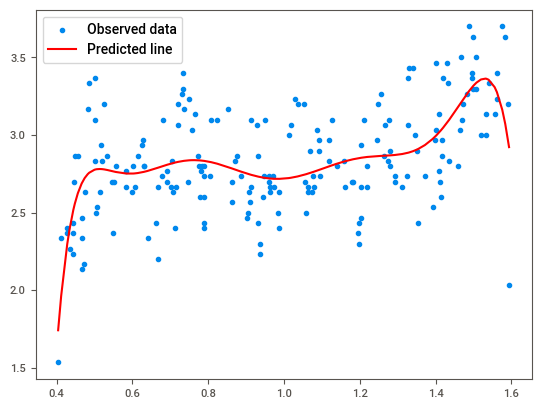

In [79]:
# Regression Line
plt.scatter(score_cp[0],score_cp[1])
plt.plot(score_cp[0], pred5, "r")
plt.legend(['Observed data', 'Predicted line'])
plt.show()